# Summary of Results

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
from pathlib import Path
import collections

In [2]:
import yaml

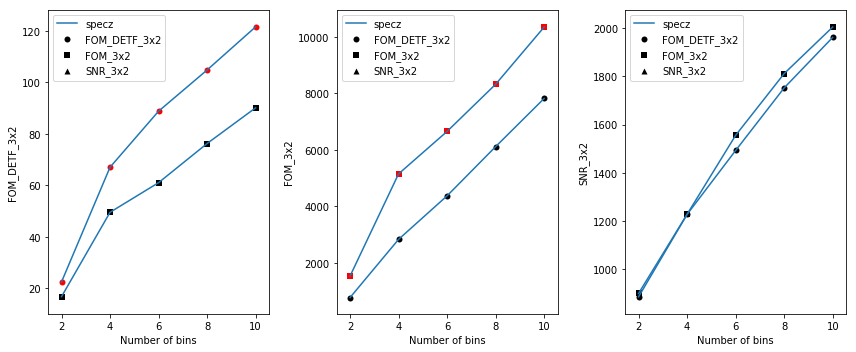

In [17]:
def summary_plot(**jobs):
    """
    """
    base = Path('results')
    metrics = 'FOM_DETF_3x2', 'FOM_3x2', 'SNR_3x2'
    markers = 'o', 's', '^'
    fig, axes = plt.subplots(1, 3, figsize=(12, 5))
    for j, label in enumerate(jobs):
        color = f'C{j}'
        for ax in axes:
            ax.plot([], [], '-', c=color, label=label)
        for job in jobs[label]:
            with open(base / job / 'config.yaml') as f:
                config = yaml.safe_load(f)
            metric = config['metric']
            marker = markers[metrics.index(metric)]
            nbin = []
            scores = {m: [] for m in metrics}
            for n in config['nbin']:
                scorespath = base / job / f'nbin-{n}' / f'scores-{n}.yaml'
                if scorespath.exists():
                    with open(scorespath) as f:
                        best_scores = yaml.safe_load(f)
                    nbin.append(n)
                    for m, v in best_scores.items():
                        scores[m].append(v)
            for i,m in enumerate(metrics):
                ax = axes[i]
                ax.plot(nbin, scores[m], ls='-', c=color)
                ax.scatter(nbin, scores[m], lw=0, c='r' if m==metric else 'k', marker=marker)
    for i,m in enumerate(metrics):
        ax = axes[i]
        ax.set_xlabel('Number of bins')
        ax.set_ylabel(m)
        for j, mopt in enumerate(metrics):
            ax.scatter([], [], c='k', lw=0, marker=markers[j], label=mopt)
        ax.legend()
    plt.tight_layout()
    
summary_plot(specz=['direct-detf', 'direct-fom'])